In [1]:
import re
import csv
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier 

In [2]:
points_rank_csvs = glob.glob('./points_rank/20*.csv')

In [3]:
df_rank = pd.DataFrame()
for csv in points_rank_csvs:
    df_rank = df_rank.append(pd.read_csv(csv))

In [4]:
df_rank["date"] = pd.to_datetime(df_rank["date"])
df_rank = df_rank.set_index("date")
df_rank = df_rank.sort_index()

In [5]:
gd_csvs = glob.glob('./goal_differences/20*.csv')
df_gd = pd.DataFrame()
for csv in gd_csvs:
    df_gd = df_gd.append(pd.read_csv(csv))
    
df_gd["date"] = pd.to_datetime(df_gd["date"])
df_gd = df_gd.set_index("date")
df_gd = df_gd.sort_index()

In [6]:
points_csvs = glob.glob('./points/20*.csv')
df_points = pd.DataFrame()
for csv in points_csvs:
    df_points = df_points.append(pd.read_csv(csv))
    
df_points["date"] = pd.to_datetime(df_points["date"])
df_points = df_points.set_index("date")
df_points = df_points.sort_index()

In [7]:
df_match = pd.read_csv("./match_data_yearly/all_years.csv",index_col=0)
df_match["Date"] = pd.to_datetime(df_match["Date"])

In [8]:
df_points_gd_all =  pd.DataFrame(index=df_match.index, columns=["Date","Sec","HomePoints","AwayPoints","HomeRank","AwayRank","RankDiff","HomeGD","AwayGD","W/L"])
df_points_gd_all["W/L"] = df_match["W/L"]
df_points_gd_all["Sec"] = df_match["Sec"]
df_points_gd_all["Date"]=df_match["Date"] 
df_points_gd_all

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
6010903,2006-03-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6012807,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6012231,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6011323,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6010820,2006-03-05,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
20340810,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20343331,2020-12-19,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
for index,row in df_match.iterrows():
    
    home_points = df_points.at[row["Date"],row["Home"]]
    away_points = df_points.at[row["Date"],row["Away"]]
    df_points_gd_all.at[index,"HomePoints"] = home_points
    df_points_gd_all.at[index,"AwayPoints"] = away_points
     
    home_rank = df_rank.at[row["Date"],row["Home"]]
    away_rank = df_rank.at[row["Date"],row["Away"]]
    rank_diff = away_rank - home_rank
    
    df_points_gd_all.at[index,"HomeRank"] = home_rank
    df_points_gd_all.at[index,"AwayRank"] = away_rank
    df_points_gd_all.at[index,"RankDiff"] = rank_diff
    
    home_gd = df_gd.at[row["Date"],row["Home"]]
    away_gd = df_gd.at[row["Date"],row["Away"]]
    
    df_points_gd_all.at[index,"HomeGD"] = home_gd
    df_points_gd_all.at[index,"AwayGD"] = away_gd
    
    
    

In [10]:
df_points_gd_0614 =  df_points_gd_all[df_points_gd_all["Date"].dt.year < 2015]
df_points_gd_0614

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
6010903,2006-03-04,1,0,0,1,1,0,0,0,0
6012807,2006-03-05,1,0,0,3,3,0,0,0,2
6012231,2006-03-05,1,0,0,3,3,0,0,0,1
6011323,2006-03-05,1,0,0,3,3,0,0,0,0
6010820,2006-03-05,1,0,0,3,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
14342205,2014-12-06,34,47,50,8,7,-1,14,8,0
14340308,2014-12-06,34,62,45,1,10,9,21,-2,2
14343609,2014-12-06,34,13,62,18,1,-17,-58,28,0


### 順位差と勝敗結果の関係性

In [11]:
cross = pd.crosstab(df_points_gd_0614['RankDiff'], df_points_gd_0614['W/L'],normalize='index')
cross

W/L,0,1,2
RankDiff,,,
-17,0.166667,0.250000,0.583333
-16,0.153846,0.307692,0.538462
-15,0.238095,0.190476,0.571429
-14,0.153846,0.192308,0.653846
-13,0.194444,0.305556,0.500000
-12,0.120690,0.379310,0.500000
-11,0.275362,0.333333,0.391304
-10,0.253333,0.240000,0.506667
-9,0.240964,0.385542,0.373494


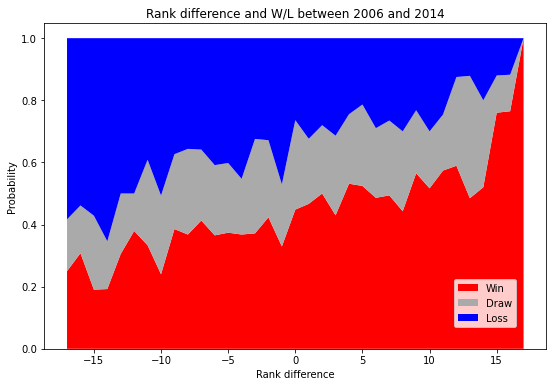

In [37]:
fig, ax = plt.subplots(figsize=(9,6))
ax.stackplot(cross.index,cross[1],cross[0],cross[2],labels=["Win","Draw","Loss"],colors=["#f00","#aaa","#00f"])
ax.legend(loc='lower right', bbox_to_anchor=(0.95, 0.05))
ax.set_xlabel("Rank difference")
ax.set_ylabel("Probability")
plt.title("Rank difference and W/L between 2006 and 2014")
plt.show()

In [13]:
df_points_gd_0614["W/L"].value_counts()

1    1201
2     902
0     651
Name: W/L, dtype: int64

In [14]:
len(df_points_gd_0614[df_points_gd_0614["W/L"] == 0]) / len(df_points_gd_0614)

0.23638344226579522

In [44]:
df_points_gd_0614["RankDiff"].value_counts()

 0     250
 2     150
-3     148
 4     143
-2     137
 3     121
-6     115
-5     107
 6     107
-4     106
 1     105
 5     103
-7      92
-8      87
-1      85
-9      83
 7      83
-10     75
 8      70
-11     69
 9      69
 11     61
 10     60
-12     58
 12     56
-13     36
 13     33
-14     26
 14     25
 15     25
-15     21
 16     17
-16     13
-17     12
 17      6
Name: RankDiff, dtype: int64

### 考察

* 順位差と勝敗の相関関係は概ねある
* 引き分けの割合はほぼどの順位差においても20~25%ぐらいある(06-14で23.6%)

順位と勝敗は相関関係があるが,絶対的なものではない

±2位差が727試合あって

### 実際に予測してみる

In [16]:
df_points_gd_1520 = df_points_gd_all[df_points_gd_all["Date"].dt.year >= 2015]
df_points_gd_1520

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L
ID,,,,,,,,,,
15010846,2015-03-07,1,0,0,1,1,0,0,0,0
15010922,2015-03-07,1,0,0,1,1,0,0,0,0
15011028,2015-03-07,1,0,0,1,1,0,0,0,1
15013378,2015-03-07,1,0,0,1,1,0,0,0,1
15015429,2015-03-07,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,58,59,5,4,-1,11,9,0
20340810,2020-12-19,34,60,48,3,8,5,16,10,1
20343331,2020-12-19,34,35,42,14,11,-3,-6,-9,0


In [40]:
df_points_gd_1520["W/L"].value_counts()

1    735
2    674
0    427
Name: W/L, dtype: int64

In [17]:
df_points_gd_pred = df_points_gd_1520.assign(Prediction=np.nan)
df_points_gd_pred 

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction
ID,,,,,,,,,,,
15010846,2015-03-07,1,0,0,1,1,0,0,0,0,NaN
15010922,2015-03-07,1,0,0,1,1,0,0,0,0,NaN
15011028,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
15013378,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
15015429,2015-03-07,1,0,0,1,1,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
20340120,2020-12-19,34,58,59,5,4,-1,11,9,0,NaN
20340810,2020-12-19,34,60,48,3,8,5,16,10,1,NaN
20343331,2020-12-19,34,35,42,14,11,-3,-6,-9,0,NaN


In [18]:
for index,row in df_points_gd_pred.iterrows():
    if row["HomePoints"] > row["AwayPoints"]:
        pred = 1
    elif row["HomePoints"] < row["AwayPoints"]:
        pred = 2
    else:
        if row["HomeGD"] > row["AwayGD"]:
            pred = 1
        elif row["HomeGD"] < row["AwayGD"]:
            pred = 2
        else:
            pred = 0
    df_points_gd_pred.at[index,"Prediction"] = pred
    
df_points_gd_pred = df_points_gd_pred.astype(int)

In [19]:
df_points_gd_pred

,Date,Sec,HomePoints,AwayPoints,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD,W/L,Prediction
ID,,,,,,,,,,,
15010846,1425686400000000000,1,0,0,1,1,0,0,0,0,0
15010922,1425686400000000000,1,0,0,1,1,0,0,0,0,0
15011028,1425686400000000000,1,0,0,1,1,0,0,0,1,0
15013378,1425686400000000000,1,0,0,1,1,0,0,0,1,0
15015429,1425686400000000000,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
20340120,1608336000000000000,34,58,59,5,4,-1,11,9,0,2
20340810,1608336000000000000,34,60,48,3,8,5,16,10,1,1
20343331,1608336000000000000,34,35,42,14,11,-3,-6,-9,0,2


In [20]:
df_points_gd_pred["W/L"].value_counts()

1    735
2    674
0    427
Name: W/L, dtype: int64

In [21]:
df_points_gd_pred["Prediction"].value_counts()

2    883
1    874
0     79
Name: Prediction, dtype: int64

In [22]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]])


848

In [23]:
len(df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]])/len(df_points_gd_pred)


0.46187363834422657

In [24]:
df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Prediction"].value_counts()


1    433
2    393
0     22
Name: Prediction, dtype: int64

In [25]:
 df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Sec"].value_counts().sort_index()

1     29
2     29
3     26
4     25
5     33
6     29
7     41
8     35
9     33
10    33
11    36
12    30
13    38
14    36
15    35
16    39
17    38
18    18
19    18
20    19
21    19
22    18
23    17
24    17
25    18
26    17
27     7
28    16
29    16
30    13
31    22
32    16
33    17
34    15
Name: Sec, dtype: int64

In [26]:
 df_points_gd_pred["Sec"].value_counts().sort_index()
    

1     72
2     72
3     72
4     72
5     72
6     72
7     72
8     72
9     72
10    72
11    72
12    72
13    72
14    72
15    72
16    72
17    72
18    36
19    36
20    36
21    36
22    36
23    36
24    36
25    36
26    36
27    36
28    36
29    36
30    36
31    36
32    36
33    36
34    36
Name: Sec, dtype: int64

In [27]:
accuracy_by_sec = df_points_gd_pred[df_points_gd_pred["W/L"] == df_points_gd_pred["Prediction"]]["Sec"].value_counts().sort_index() / df_points_gd_pred["Sec"].value_counts().sort_index()

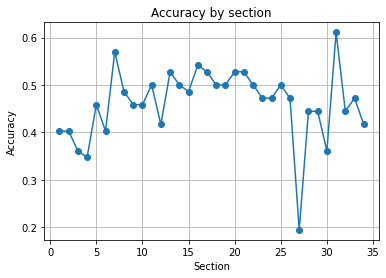

In [28]:
plt.plot(accuracy_by_sec.index, accuracy_by_sec.values, marker="o")
plt.title("Accuracy by section")
plt.xlabel("Section")
plt.ylabel("Accuracy")
plt.grid(True)

### 考察

* 的中率 45.5%
* 意外と他の手法と遜色ないぐらいの的中率ではある
* 開幕したての頃は順位が最適化されていないので,そこで精度落としている



### ±4位差のときは引き分けとする

### RF 予測

In [29]:
df_recent_stats = pd.read_csv("./recent_stats.csv", index_col=0)
df_recent_stats.fillna({'HomeShots':10, 'HomeShotsOnTarget':3, 'HomeShotsFromPK':0.2, 'HomePasses':400,
                        'HomeCrosses':16, 'HomeDirectFK':10, 'HomeIndirectFK':2, 'HomeCK':4,
                        'HomeThrowin':20, 'HomeDribbling':10, 'HomeTackles':18, 'HomeClearances':23,
                        'HomeIntercepts':2, 'HomeOffsides':1.5, 'HomeYellowCards':1, 'HomeRedCards':0,
                        'Home30mLineEntries':33, 'HomePenaltyAreaEntries':9, 'HomeAttacks':117,
                        'HomeChanceBuildingRate':10, 'HomePossession':44,
                        'AwayShots':10, 'AwayShotsOnTarget':3, 'AwayShotsFromPK':0.2, 'AwayPasses':400,
                        'AwayCrosses':16, 'AwayDirectFK':10, 'AwayIndirectFK':2, 'AwayCK':4,
                        'AwayThrowin':20, 'AwayDribbling':10, 'AwayTackles':18, 'AwayClearances':23,
                        'AwayIntercepts':2, 'AwayOffsides':1.5, 'AwayYellowCards':1, 'AwayRedCards':0,
                        'Away30mLineEntries':33, 'AwayPenaltyAreaEntries':9, 'AwayAttacks':117,
                        'AwayChanceBuildingRate':10, 'AwayPossession':44}, inplace=True)
df_recent_stats

,HomeShots,HomeShotsOnTarget,HomeShotsFromPK,HomePasses,HomeCrosses,HomeDirectFK,HomeIndirectFK,HomeCK,HomeThrowin,HomeDribbling,...,AwayClearances,AwayIntercepts,AwayOffsides,AwayYellowCards,AwayRedCards,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession
10011354,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011229,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10012205,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10011007,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
10012178,10.0,3.0,0.2,400.0,16.0,10.0,2.0,4.0,20.0,10.0,...,23.0,2.0,1.5,1.0,0.0,33.0,9.0,117.0,10.00,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20340120,20.0,6.8,0.0,494.8,17.8,11.8,2.0,6.8,23.4,12.2,...,24.2,1.8,1.8,0.4,0.0,34.4,13.2,113.4,11.58,45.78
20340810,12.2,4.0,0.2,537.2,11.6,14.2,1.0,3.6,21.8,14.2,...,21.8,1.8,3.0,1.0,0.2,50.4,14.2,127.2,11.30,52.58
20343331,13.0,4.4,0.0,598.6,16.2,9.6,3.2,2.6,17.8,11.4,...,22.0,3.0,1.8,1.8,0.0,37.2,9.6,115.0,8.36,55.64
20342218,9.0,4.4,0.0,379.8,8.4,13.8,1.2,3.6,18.8,11.4,...,19.4,2.4,1.2,0.8,0.0,52.4,11.2,107.8,12.16,59.62


In [30]:
df = pd.concat([df_match,df_recent_stats,df_points_gd_all[["HomeRank","AwayRank","RankDiff","HomeGD","AwayGD"]]], axis=1)
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,...,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD
6010524,2006,1,2006-03-05,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6010820,2006,1,2006-03-05,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6010903,2006,1,2006-03-04,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
6011001,2006,1,2006-03-05,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
6011323,2006,1,2006-03-05,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20341121,2020,34,2020-12-19,kashiwa-reysol,kawasaki-frontale,11,21,2,3,2,...,64.0,24.4,115.2,16.08,54.30,7,1,-6,15,56
20342218,2020,34,2020-12-19,fc-tokyo,vissel-kobe,22,18,1,0,1,...,52.4,11.2,107.8,12.16,59.62,6,12,6,4,-8
20343331,2020,34,2020-12-19,sagan-tosu,oita-trinita,33,31,2,2,0,...,37.2,9.6,115.0,8.36,55.64,14,11,-3,-6,-9
20343405,2020,34,2020-12-19,yokohama-fc,yokohama-fa-marinos,34,5,3,1,1,...,61.2,19.6,124.4,11.58,54.54,15,9,-6,-24,12


In [31]:
df = df.set_index("Date")
df.sort_index(inplace=True)

In [32]:
df.columns

Index(['Year', 'Sec', 'Home', 'Away', 'HomeID', 'AwayID', 'HomeGF', 'AwayGF',
       'W/L', 'Stadium', 'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRan

In [33]:
df

,Year,Sec,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,...,Away30mLineEntries,AwayPenaltyAreaEntries,AwayAttacks,AwayChanceBuildingRate,AwayPossession,HomeRank,AwayRank,RankDiff,HomeGD,AwayGD
Date,,,,,,,,,,,,,,,,,,,,,
2006-03-04,2006,1,gamba-osaka,urawa-red-diamonds,9,3,1,1,0,万博,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0
2006-03-05,2006,1,yokohama-fa-marinos,kyoto-sanga,5,24,4,1,1,日産ス,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,nagoya-grampus-eight,cerezo-osaka,8,20,3,2,1,瑞穂陸,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,sanfrecce-hiroshima,kashima-antlers,10,1,3,4,2,広島ビ,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
2006-03-05,2006,1,jubilo-iwata,avispa-fukuoka,13,23,1,1,0,静岡,...,NaN,NaN,NaN,NaN,NaN,3,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-19,2020,34,nagoya-grampus-eight,sanfrecce-hiroshima,8,10,1,0,1,豊田ス,...,50.4,14.2,127.2,11.30,52.58,3,8,5,16,10
2020-12-19,2020,34,urawa-red-diamonds,consadole-sapporo,3,14,0,2,2,埼玉,...,46.4,13.8,123.8,11.02,53.80,10,12,2,-11,-13
2020-12-19,2020,34,kashima-antlers,cerezo-osaka,1,20,1,1,0,カシマ,...,34.4,13.2,113.4,11.58,45.78,5,4,-1,11,9


In [35]:
loglosses = []
accuracies = []
calibrations = []

for year in (2015,2016,2017,2018,2019,2020):

    df_past = pd.concat([df[f"{year-3}"],df[f"{year-2}"],df[f"{year-1}"]])
    X_train=df_past[['Sec',  'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD']].values
    y_train = df_past["W/L"].values

    df_future = df[f"{year}"]
    X_test=df_future[[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD']].values
    y_test = df_future["W/L"].values


    rf= RandomForestClassifier(max_depth=5, random_state=1234)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)

    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
    logloss = log_loss(y_test,y_pred_proba,labels=[0,1,2])
    loglosses.append(logloss)


    pred_winrate_sum=0 # 予測勝率の和
    actual_win_sum=0 # 実勝利数の和

    for test,pred,pred_proba in zip(y_test,y_pred,y_pred_proba):
        # ホーム優位
        if pred == 1: 
            pred_winrate_sum += pred_proba[1] 
            if test == 1: 
                actual_win_sum += 1
        # アウェイ優位
        elif pred==2: 
            pred_winrate_sum += pred_proba[2] 
            if test == 2:
                actual_win_sum += 1

    calibration = pred_winrate_sum/actual_win_sum
    calibrations.append(calibration)
    
    print(f"{year} 的中率:{accuracy:.3f}, 対数損失:{logloss:.3f}, 較正値:{calibration:.3f}")

print("======================================")    
print(f"的中率(Accuracy) : {np.mean(accuracies):.3f}" )
print(f"対数損失(Log loss) : {np.mean(loglosses):.3f}" )
print(f"較正値(Calibration ) : {np.mean(calibrations):.3f}")


2015 的中率:0.474, 対数損失:1.049, 較正値:0.983
2016 的中率:0.503, 対数損失:1.021, 較正値:0.960
2017 的中率:0.471, 対数損失:1.049, 較正値:1.030
2018 的中率:0.412, 対数損失:1.072, 較正値:1.115
2019 的中率:0.448, 対数損失:1.066, 較正値:1.026
2020 的中率:0.490, 対数損失:1.037, 較正値:0.913
的中率(Accuracy) : 0.466
対数損失(Log loss) : 1.049
較正値(Calibration ) : 1.004


In [36]:
pd.DataFrame(rf.feature_importances_,[ 'Sec', 'Attendances', 'HomeRate', 'AwayRate', 'HomeRD',
       'AwayRD', 'HomeShots', 'HomeShotsOnTarget', 'HomeShotsFromPK',
       'HomePasses', 'HomeCrosses', 'HomeDirectFK', 'HomeIndirectFK', 'HomeCK',
       'HomeThrowin', 'HomeDribbling', 'HomeTackles', 'HomeClearances',
       'HomeIntercepts', 'HomeOffsides', 'HomeYellowCards', 'HomeRedCards',
       'Home30mLineEntries', 'HomePenaltyAreaEntries', 'HomeAttacks',
       'HomeChanceBuildingRate', 'HomePossession', 'AwayShots',
       'AwayShotsOnTarget', 'AwayShotsFromPK', 'AwayPasses', 'AwayCrosses',
       'AwayDirectFK', 'AwayIndirectFK', 'AwayCK', 'AwayThrowin',
       'AwayDribbling', 'AwayTackles', 'AwayClearances', 'AwayIntercepts',
       'AwayOffsides', 'AwayYellowCards', 'AwayRedCards', 'Away30mLineEntries',
       'AwayPenaltyAreaEntries', 'AwayAttacks', 'AwayChanceBuildingRate',
       'AwayPossession', 'HomeRank', 'AwayRank', 'RankDiff', 'HomeGD',
       'AwayGD'], columns=["imp"]).sort_values("imp",ascending=False)

,imp
AwayPasses,0.041466
AwayRate,0.039249
HomePossession,0.035516
AwayChanceBuildingRate,0.034829
Home30mLineEntries,0.034474
AwayPossession,0.034429
RankDiff,0.033063
AwayShotsOnTarget,0.029651
HomeChanceBuildingRate,0.026985
AwayShots,0.026736


### 考察

順位に関しては,ほとんど精度向上に貢献しなかった.
また,順位と勝敗関係にはかすかに相関関係があるが,それほど大きくはなかった.
